In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("accidents_2017.csv")
data.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [3]:
list(data.columns)

['Id',
 'District Name',
 'Neighborhood Name',
 'Street',
 'Weekday',
 'Month',
 'Day',
 'Hour',
 'Part of the day',
 'Mild injuries',
 'Serious injuries',
 'Victims',
 'Vehicles involved',
 'Longitude',
 'Latitude']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


## To convert string to not a number

In [5]:
import numpy as np

In [6]:
data.isnull().sum().any() ## if false meaning there are no null values

False

In [7]:
# replace Unknown with n.a
data.replace('Unknown', np.nan, inplace = True)

In [8]:
#Now, There are null values 
data.isnull().sum().any()

True

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10312 non-null object
Neighborhood Name    10312 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [10]:
# drop unnecessary columns
data.drop(['District Name','Neighborhood Name','Part of the day'], axis=1, inplace = True)
data.columns

Index(['Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

## change column names, replace spaces by underscores and uppercase letters by lower case 

In [11]:
data.rename(columns = lambda x:x.replace(' ','_').lower(), inplace = True)

In [12]:
data.columns

Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries',
       'serious_injuries', 'victims', 'vehicles_involved', 'longitude',
       'latitude'],
      dtype='object')

In [13]:
data['year'] = np.repeat(2017,data.shape[0])
data.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,December,8,21,5,0,5,2,2.167356,41.360885,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,July,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,May,25,14,1,0,1,3,2.185272,41.416365,2017


In [14]:
list(data.month.unique())

['October',
 'September',
 'December',
 'July',
 'May',
 'June',
 'January',
 'April',
 'March',
 'November',
 'February',
 'August']

In [15]:
# Month names to int
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
data['month'].replace(month_to_int,inplace=True) # convert month names into numbers

In [16]:
month_to_int

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [17]:
# obtain new month names
list(data.month.unique())

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

In [18]:
# commbine the Month,Day,Hour,Year into single column
data['date'] = pd.to_datetime(data[['year','month','day','hour']])
data.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360885,2017,2017-12-08 21:00:00
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017,2017-07-21 02:00:00
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017,2017-05-25 14:00:00


In [19]:
data.date.dtypes

dtype('<M8[ns]')

In [20]:
# To access individual elements of month,day,or hour or dayofweek
data['date'].dt.year
data['date'].dt.month
data['date'].dt.day
data['date'].dt.hour
data['date'].dt.dayofweek

0        4
1        4
2        4
3        4
4        3
5        2
6        5
7        1
8        0
9        2
10       3
11       2
12       4
13       0
14       5
15       0
16       5
17       3
18       0
19       4
20       3
21       2
22       0
23       0
24       1
25       2
26       2
27       5
28       2
29       1
        ..
10309    1
10310    4
10311    0
10312    0
10313    0
10314    3
10315    1
10316    6
10317    1
10318    1
10319    5
10320    2
10321    4
10322    5
10323    2
10324    3
10325    3
10326    2
10327    2
10328    2
10329    6
10330    3
10331    3
10332    2
10333    3
10334    1
10335    2
10336    3
10337    4
10338    6
Name: date, Length: 10339, dtype: int64

In [21]:
# Drop columns
data.drop(['hour','day','month','year','weekday'], axis = 1, inplace = True)
list(data.columns)

['id',
 'street',
 'mild_injuries',
 'serious_injuries',
 'victims',
 'vehicles_involved',
 'longitude',
 'latitude',
 'date']

In [22]:
# drop the street column as we are visualizing the accident area using longitude and latitude
data.drop(['street'], axis = 1, inplace = True)

In [23]:
# if we have spaces in the entries of id
data.id.loc[0]

'2017S008429    '

In [24]:
# remove the trailing spaces present in the id entries.
data.id = data.id.apply(lambda x: x.strip())

In [25]:
# spaces removed succesfully
data.id.loc[0]

'2017S008429'

In [26]:
#set index 
data.set_index('id', inplace = True)

In [27]:
# after we set the index we can easily access information using its id
data.loc['2017S008429']

mild_injuries                          2
serious_injuries                       0
victims                                2
vehicles_involved                      2
longitude                        2.12562
latitude                           41.34
date                 2017-10-13 08:00:00
Name: 2017S008429, dtype: object

In [28]:
# remove duplicate entries if any
data.duplicated().sum()

9

In [29]:
data[data.duplicated()]

,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S006811,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S001504,1,0,1,2,2.139400,41.418656,2017-02-23 14:00:00
2017S004447,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00
2017S005606,1,0,1,3,2.189016,41.383396,2017-06-27 17:00:00
2017S003201,1,0,1,1,2.168349,41.430413,2017-04-06 19:00:00


In [30]:
# check the shape of the dataframe before removing duplicated columns
data.shape

(10339, 7)

In [31]:
# drop duplicates
data.drop_duplicates(inplace = True)

In [32]:
# check the shape after duplicates.
data.shape

(10330, 7)

## Ready to answer

## How many accidents were registered by the police in Barcelona in 2017?

In [33]:
print('Total number of accidents in 2017 :{}'.format(data.shape[0]))

Total number of accidents in 2017 :10330


## Distribution of car accidents per month

In [34]:
import calendar

In [35]:
## number of accident per month
accidents_month = data.groupby(data['date'].dt.month).count().date

In [36]:
# replace the month interger by month names
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]
accidents_month

January      844
February     823
March        935
April        841
May          962
June         907
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

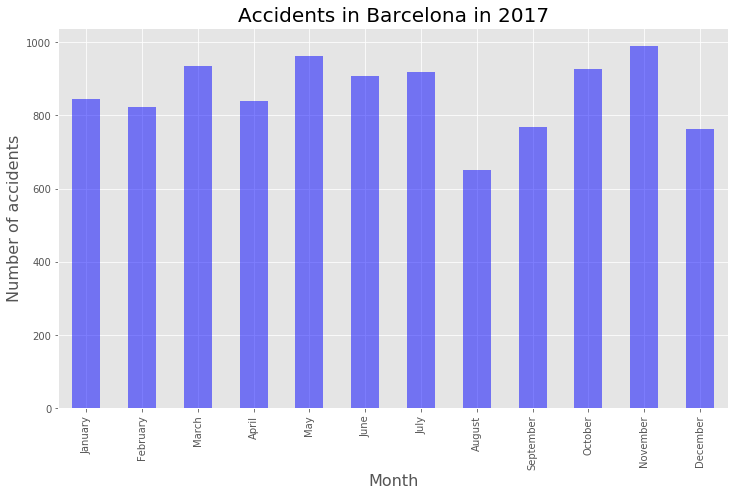

In [38]:
accidents_month.plot(kind = 'bar', figsize=(12,7), color='blue', alpha=0.5)
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

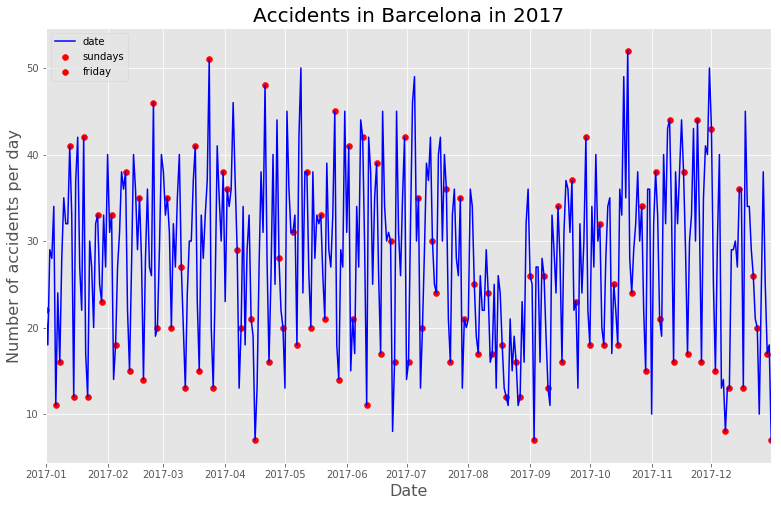

In [39]:
accidents = data.groupby(data['date'].dt.date).count().date
accidents.plot(figsize=(13,8), color='blue')
# sunday accidents 
sundays = data.groupby(data[data['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays ,color='red',label='sundays')
# friday accidents
friday = data.groupby(data[data['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday ,color='red',label='friday')
# title on x and y axis
plt.title('Accidents in Barcelona in 2017', fontsize = 20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

## Distribution of car accidents per hour

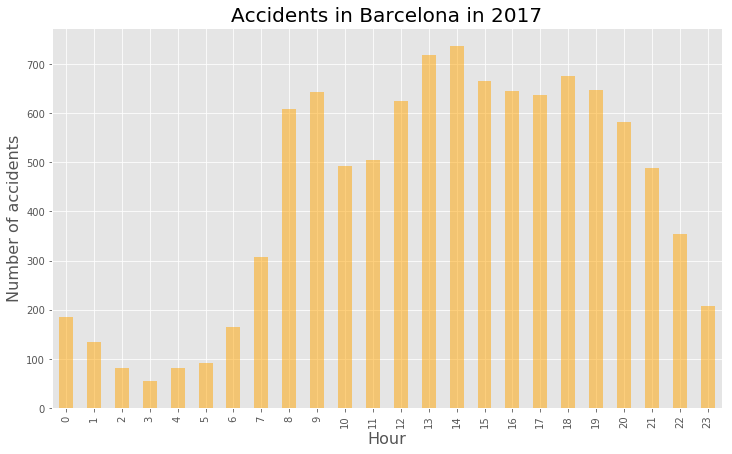

In [40]:
# Number of accidents per hour
accidents_hour = data.groupby(data['date'].dt.hour).count().date
#plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)
#title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents', fontsize=16);

## As we can observe in the plot, the greater number of accidents occur in early-morning hours 8–9 and between 12 and 20.

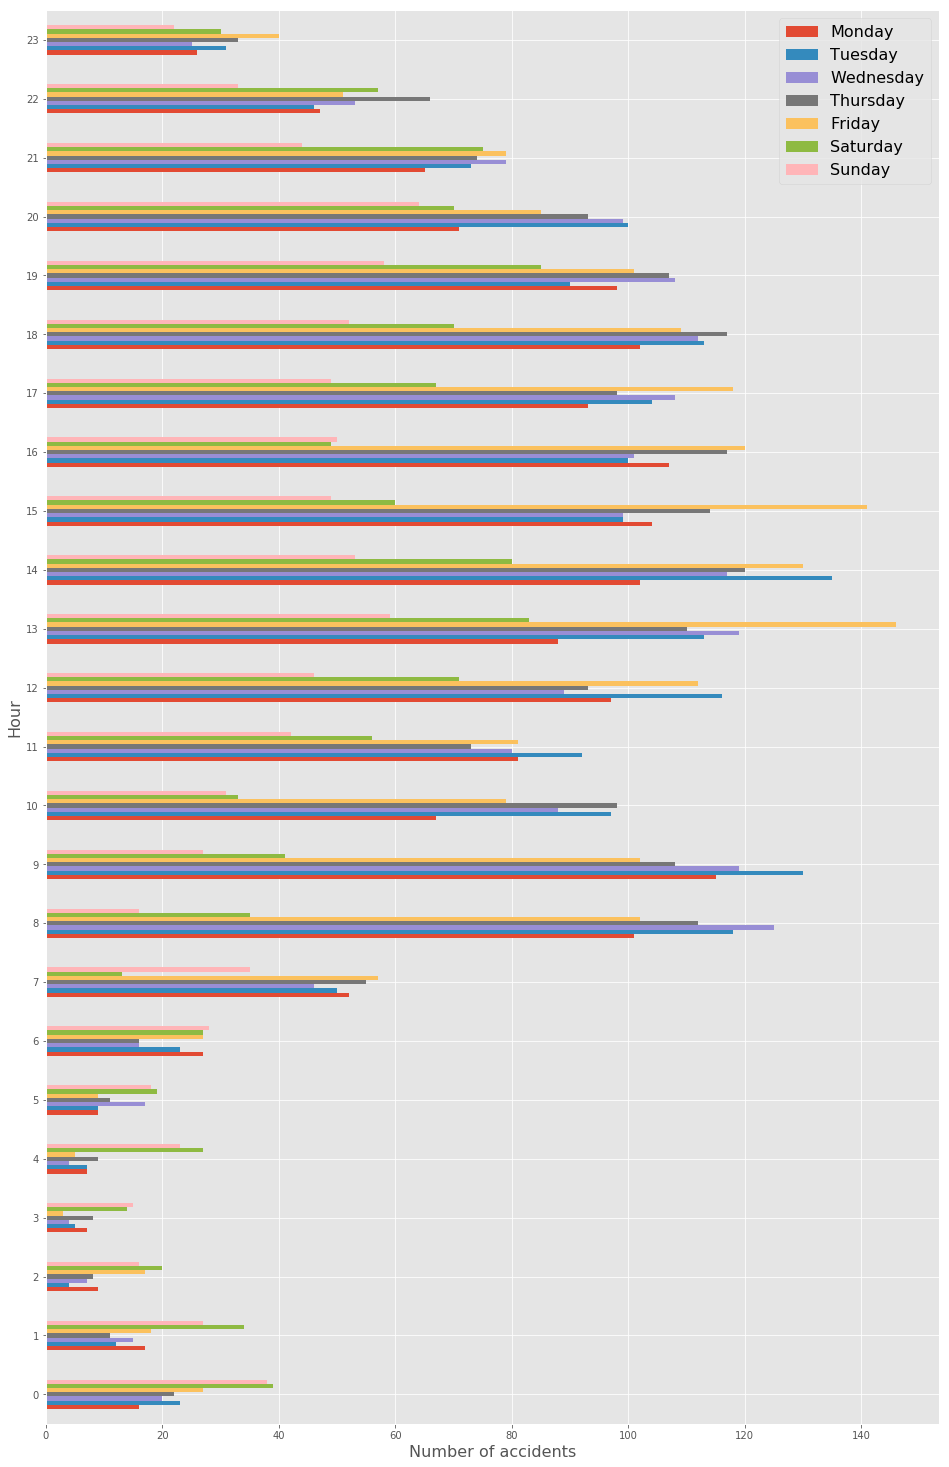

In [41]:
accidents_hour_day = data.groupby([data['date'].dt.hour.rename('hour'),data['date'].dt.dayofweek.rename('day')]).count().date
accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)], fontsize=16)
plt.ylabel('Hour',fontsize=16)
plt.xlabel('Number of accidents', fontsize=16);

## As we can easily observe, there are more accidents at night on weekends than during weekdays. On the contrary, there are much more accidents from early-morning (8) til afternoon (19) during weekdays than at the weekend.

## INSIGHTS

## Time Analysis
1. August presents the lowest number of car accidents 651 in 2017. The rest of the months present a number of accidents around 800–900.
2. The number of car accidents decrease on weekends.
3. The greater number of car accidents occurs from (8–9) and (12–20).
4. At night most of the accidents happen on weekends.


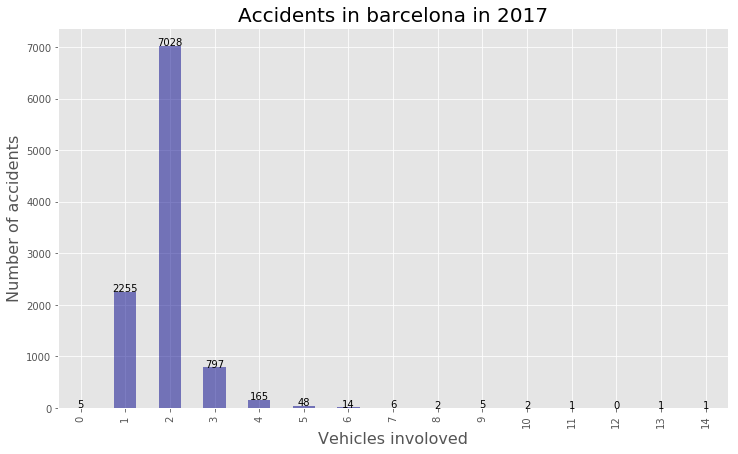

In [42]:
#Compute the number of accidents according to the number of vehicles involved
vehicles_involved = data.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12] = 0
#plot
vehicles_involved.sort_index(inplace = True)
#plot number od accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7),color='darkblue',alpha=0.5)
plt.title('Accidents in barcelona in 2017', fontsize = 20)
plt.xlabel('Vehicles involoved',fontsize=16)
plt.ylabel('Number of accidents', fontsize=16);
# print a balel above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')

Text(0, 0.5, '')

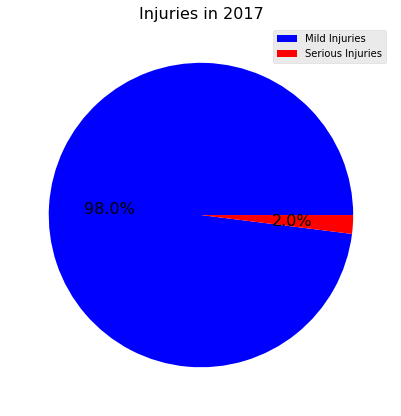

In [43]:
# get series with number of mild injuries and serious injuries
injuries = data[['mild_injuries','serious_injuries']].sum()
injuries
injuries.plot(kind='pie', figsize=(7,7), colors=['blue','red'], labels=None, autopct='%1.1f%%', fontsize = 16)
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=16)
plt.ylabel('')

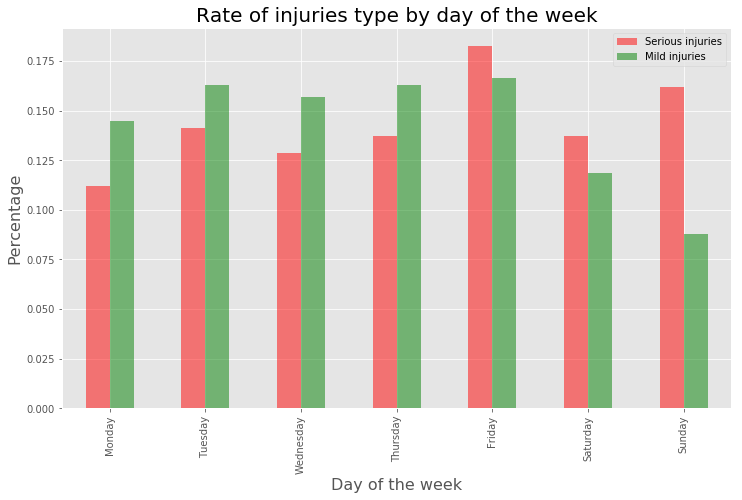

In [44]:
# Number of serious injuries per day of the week
accidents_serious = data[data['serious_injuries']!=0].groupby(data['date'].dt.dayofweek).sum().serious_injuries
#percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = data[data['mild_injuries']!=0].groupby(data['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injuries':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar', figsize=(12,7),color=['red','green'],alpha=0.5)
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

## Location analysis
The best way to analyze spacial data is by using maps. Folium is a python library that helps you create several types of Leaflet maps. We can easily generate a map of Barcelona, creating a Folium Map object. The location argument allows to center the map in a specific location (in our case Barcelona). We can also provide an initial zoom level into that location to zoom the map into the center.

In [45]:
import folium

In [46]:
# Define a map centered around Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)
#display the map
barcelona_map

In [47]:
# Create a map object of the city of barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)
# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data.latitude, data.longitude, data.serious_injuries.astype(str)):
    if label!='0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
barcelona_map

In [48]:
from folium import plugins
# Create a map object of the city of barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)
# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)
# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data.latitude, data.longitude, data.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map